In [162]:
# Importacao de pacotes
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.seterr(divide = 'ignore', invalid = 'ignore'); # ignora warnings sobre divisao por zero (no calculo da probabilidade de flipar os spins para T = 0)

In [163]:
# Inicializacao das variaveis da simulacao
N = 10 # tamanho do grid de spins
Nvarr = int(1e4) # numero de varreduras
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo
kB = 1 # constante de Boltzmann

Tmin = 0 # temperatura minima (bem proxima de zero)
Tmax = 4 # temperatura maxima
DeltaT = 0.2 # passo das temperaturas

vecT = np.arange(Tmin, Tmax + DeltaT, DeltaT) # vetor de temperaturas
NT = len(vecT) # tamanho do vetor de temperaturas

vecsigma = np.zeros((N, N)) # array de spins

vecm = np.zeros(Nvarr) # vetor de magnetizacoes medias para cada varredura
vecmstd = np.zeros(Nvarr) # vetor de desvio padrao da media das magnetizacoes para cada varredura

vecmm = np.zeros(NT) # vetor de media das magnetizacoes das Nvarr varreduras
vecmmstd = np.zeros(NT) # vetor de desvio padrao da media das magnetizacoes das Nvarr varreduras

In [164]:
# Simulacao para cada temperatura
for k in range(NT):
    T = vecT[k] # obtem a temperatura
    
    vecsigma = np.random.choice([-1, +1], (N, N)) # gera uma configuracao aleatoria de spins
    
    # Faz Nvarr varreduras sobre o grid
    for n in range(Nvarr):
        # Ordem aleatoria para varrer os spins do grid
        ordemi = np.random.permutation(N)
        ordemj = np.random.permutation(N)
        
        # Varredura sobre os spins e evolucao (flips aleatorios) devido a temperatura
        for i in ordemj:
            for j in ordemj:
                # Energia para flipar o spin na posicao i, j
                Eflip = 2*vecsigma[i, j]*(J*(vecsigma[(i - 1)%N, j]
                                             + vecsigma[(i + 1)%N, j]
                                             + vecsigma[i, (j - 1)%N]
                                             + vecsigma[i, (j + 1)%N]) + h)
                
                # Se Eflip < 0, flipa o spin;
                # caso contrario, e aplicado o passo de Monte Carlo
                if Eflip < 0:
                    vecsigma[i, j] = - vecsigma[i, j]
                else:
                    Pflip = np.exp(- Eflip/(kB*T)) # probabilidade de flipar o spin na posicao i, j
                    if np.random.random() < Pflip:
                        vecsigma[i, j] = - vecsigma[i, j]
        
        vecm[n] = vecsigma.mean() # guarda a magnetizacao desta varredura
        vecmstd[n] = vecsigma.std()/np.sqrt(N*N) # guarda o desvio padrao da magnetizacao desta varredura
    vecmm[k] = vecm.mean() # calcula a media das magnetizacoes das Nvarr varreduras
    vecmmstd[k] = vecm.std() # guarda o desvio padrao das magnetizacoes medias das Nvarr varreduras

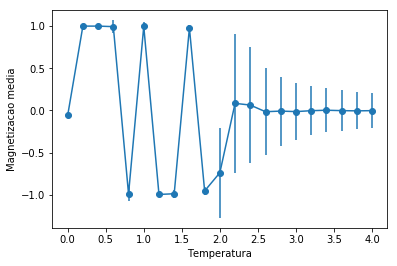

In [178]:
# Plota grafico de <m> por T
fig, ax = plt.subplots()
ax.errorbar(x = vecT, y = vecmm, yerr = vecmmstd, fmt = '-o')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Magnetizacao media')

plt.show()

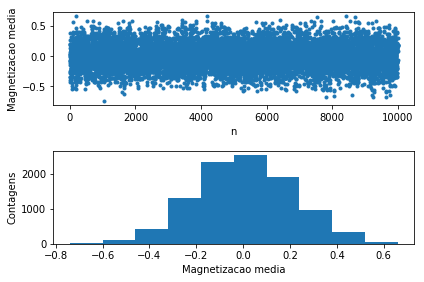

In [177]:
# Plot do histograma
fig, axes = plt.subplots(2)
axes[0].plot(np.arange(Nvarr), vecm, '.')
axes[0].set_xlabel('n')
axes[0].set_ylabel('Magnetizacao media')

axes[1].hist(vecm)
axes[1].set_xlabel('Magnetizacao media')
axes[1].set_ylabel('Contagens')

plt.tight_layout()
plt.show()